# Machine, Deep and Graph based learning

In this notebook we will explore some concepts connected to machine learning, deep learning and geometric learning

There is always more to learn but hopefully this gives you a reminder of old material and introduction of some new concepts

For general resources I recommend:

https://smlbook.org/book/sml-book-draft-latest.pdf

http://neuralnetworksanddeeplearning.com/index.html

https://www.deeplearningbook.org/

You can find general and in depth information in these links (DO NOT READ IT ALL, only what you need :) ) 

In [114]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../../data/example/dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [115]:
# lets convert target (dropout/graduate ) to binary 0/1
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})
# clean it from NaN values
df = df.dropna()

<Axes: >

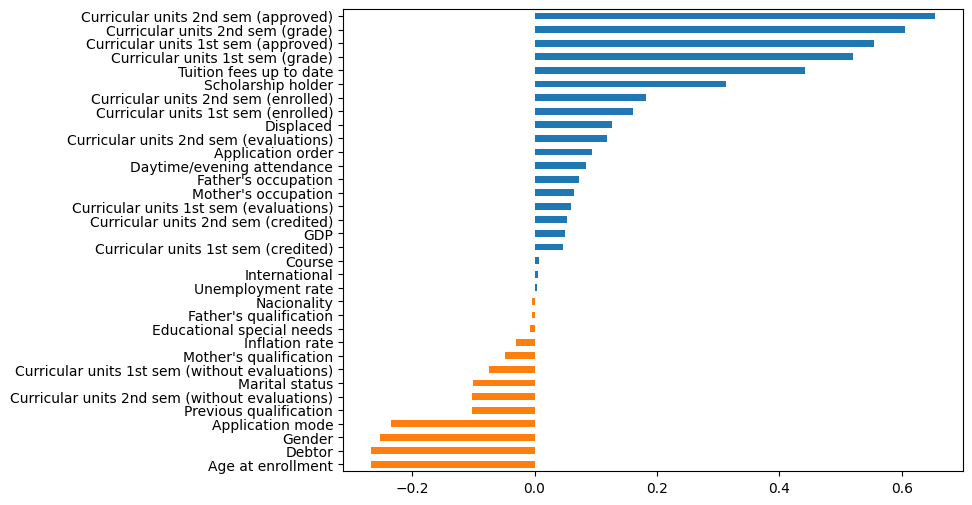

In [116]:
# now we can set up feature matrix and target vector
X = df.drop(columns=['Target'])
Y = df['Target']  

# plot feature correlations with Target
correlations = df.corr()['Target'].drop('Target').sort_values()
plt.figure(figsize=(8,6))
colors = ['C1' if v < 0 else 'C0' for v in correlations]
correlations.plot(kind='barh', color=colors)

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# drop NaN values from the dataset
X_clean = X.dropna()
Y_clean = Y[X_clean.index]

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

# logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, Y_train)
Y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(Y_test, Y_pred_log)

print("Logistic Regression Accuracy:", log_accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_log))

# random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)

print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_rf))

# Gradient Boost Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, Y_train)
Y_pred_gb = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(Y_test, Y_pred_gb)
print("\nGradient Boosting Classifier Accuracy:", gb_accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_gb))





Logistic Regression Accuracy: 0.9201101928374655

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       277
         1.0       0.91      0.96      0.94       449

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726


Random Forest Accuracy: 0.8911845730027548

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       277
         1.0       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726


Gradient Boosting Classifier Accuracy: 0.9008264462809917

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.86       277
         1.0 

In [119]:
# lets see if we can do better with a neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# convert data to PyTorch tensors
X2_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y2_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)
X2_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y2_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).unsqueeze(1)

# create DataLoader
train_dataset = TensorDataset(X2_train_tensor, Y2_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# define neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        # play around with number of nodes and dropout level to get a feel for how it affects performance
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.3) 
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

# initialize model, loss function, optimizer
# input size is number of features
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.BCELoss()    
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# training loop
num_epochs = 200
train_losses = []
val_losses = []
models_and_accuracies = []
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    # training loss
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # val loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X2_test_tensor)
        val_loss = criterion(val_outputs, Y2_test_tensor)
        val_losses.append(val_loss.item())
    
    # save model every 10 epochs
    if (epoch+1) % 10 == 0:
        models_and_accuracies.append((epoch+1, accuracy_score(Y2_test_tensor.numpy(), (val_outputs.numpy() > 0.5).astype(int))))
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss.item():.4f}, Accuracy: {models_and_accuracies[-1][1]:.4f}')





Epoch [10/200], Train Loss: 0.3822, Val Loss: 0.3345, Accuracy: 0.8650
Epoch [20/200], Train Loss: 0.3217, Val Loss: 0.2914, Accuracy: 0.8871
Epoch [30/200], Train Loss: 0.2962, Val Loss: 0.2656, Accuracy: 0.8981
Epoch [40/200], Train Loss: 0.2804, Val Loss: 0.2525, Accuracy: 0.9008
Epoch [50/200], Train Loss: 0.2646, Val Loss: 0.2451, Accuracy: 0.9077
Epoch [60/200], Train Loss: 0.2561, Val Loss: 0.2393, Accuracy: 0.9077
Epoch [70/200], Train Loss: 0.2508, Val Loss: 0.2381, Accuracy: 0.9091
Epoch [80/200], Train Loss: 0.2376, Val Loss: 0.2359, Accuracy: 0.9091
Epoch [90/200], Train Loss: 0.2443, Val Loss: 0.2348, Accuracy: 0.9160
Epoch [100/200], Train Loss: 0.2336, Val Loss: 0.2313, Accuracy: 0.9160
Epoch [110/200], Train Loss: 0.2246, Val Loss: 0.2310, Accuracy: 0.9174
Epoch [120/200], Train Loss: 0.2264, Val Loss: 0.2321, Accuracy: 0.9174
Epoch [130/200], Train Loss: 0.2184, Val Loss: 0.2319, Accuracy: 0.9105
Epoch [140/200], Train Loss: 0.2031, Val Loss: 0.2334, Accuracy: 0.9063
E

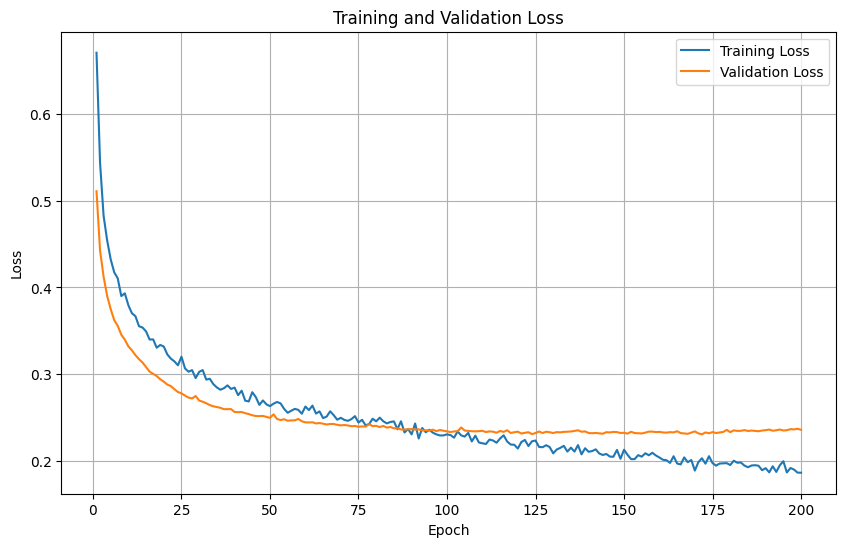

In [112]:
# plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

It is important to monitor the training/validation loss to observe if the network is overfitting as the network itself is able to fit to most non-linear data. Observe at around epoch 125 the model training and validation loss is starting to diverge.

We can keep track of each model every 10 epochs or so and see how their accuracy changes. 

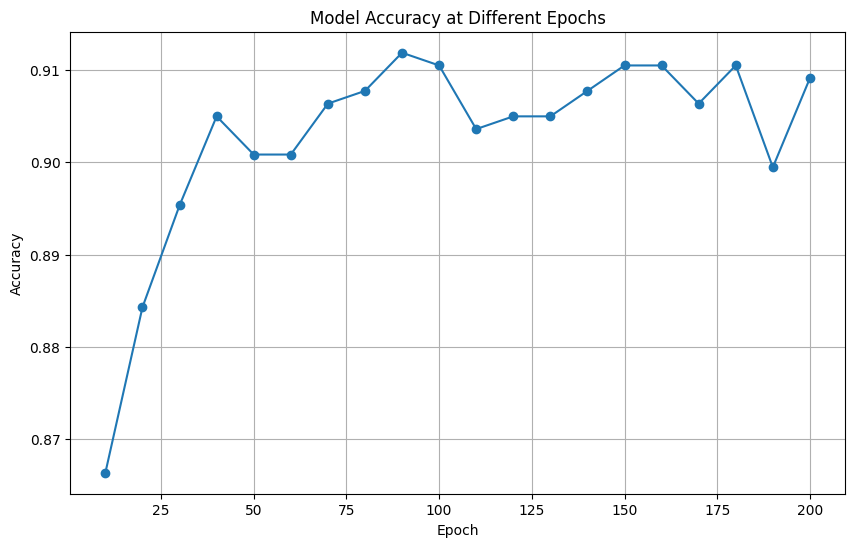

In [111]:
# plot the performance of each saved model
plt.figure(figsize=(10, 6))
epochs, accuracies = zip(*models_and_accuracies)
plt.plot(epochs, accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy at Different Epochs')
plt.grid(True)
plt.show()


Experiment with changing the number of nodes and dropout level to see how it affects performance.

Suggestions to try.

Increase change nodes to: [16,32,128]

Change dropout to [0.2, 0.4, 0.6]

Experiment with number of layers (1, 2, 4 etc)

More in depth about Pytorch and Pytorch_geometric can be found in:

https://docs.pytorch.org/tutorials/beginner/basics/intro.html

https://pytorch-geometric.readthedocs.io/en/latest/

https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html

For GNNs I suggest 

https://www.datacamp.com/tutorial/comprehensive-introduction-graph-neural-networks-gnns-tutorial

https://distill.pub/2021/gnn-intro/ 

